
# Project: Investigate a Dataset (tmdb-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Collected from The Movie Database (TMDb), tmdb-movies dataset that contains information about 10,000 movies will be analyzed in this report woth the following 3 main posed questions:
 
Q1-  Which movies are the most popular of all time? thier genres? 
- which one of them had the highest (budget/revenue)? 
- What is thier mean runtime?

Q2- who are the highest revenue directors of all time? 
thier movie genres/avg.budget/avg.runtime?

Q3- how much on average does it cost to produce a sience fiction movie? who is most producer company of this genres?
- how much on average is its revenues? 
- who are the most succeful (movies based on papilarity/actors&directors based on ave.votes) of this genres ?
- what is the avg.runtime?
- its trend over years?

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [26]:
# Loading dataset
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [27]:
df_movies.shape

(10866, 21)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 

### 1. Removing duplicates
duplication in 'id', 'imdb_id', and 'original_title' should be removed.

In [29]:
# checking for duplicated values
df_movies['id'].duplicated().sum()

1

In [30]:
df_movies['imdb_id'].duplicated().sum()

10

In [31]:
df_movies['original_title'].duplicated().sum()

295

In [32]:
# dropping duplicated values
df_movies['id'].drop_duplicates(inplace=True)
df_movies['imdb_id'].drop_duplicates(inplace=True)
df_movies['original_title'].drop_duplicates(inplace=True)

In [33]:
# checking if change was applied
df_movies['id'].duplicated().sum()

0

In [34]:
df_movies['original_title'].duplicated().sum()

0

In [35]:
df_movies['imdb_id'].duplicated().sum()

0

In [36]:
df_movies.shape

(10866, 21)

### 2. Dropping irrelevant columns
columns such as 'homepage' is completely irrelevant to the analysis

In [37]:
df_movies.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [38]:
irrelevent = ['id','imdb_id','homepage','tagline','overview']
df_movies.drop(irrelevent, axis=1,inplace=True)
df_movies.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


### 3. Missing Values

In [39]:
df_movies.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

since missing values here is not numeric and we donnot want to loss a large amount of data related to these missing values we can replace it with a new category, (e.g. director: Unknown)

In [40]:
# replacing NaN values in cast, director, genres, production companies with 'Unknown'
df_movies['cast'].fillna('Unknown', inplace=True)
df_movies['director'].fillna('Unknown', inplace=True)
df_movies['genres'].fillna('Unknown', inplace=True)
df_movies['production_companies'].fillna('Unknown', inplace=True)

# replacing NaN values in keywords with 'no keywords'
df_movies['keywords'].fillna('no keywords', inplace=True)

In [41]:
df_movies.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

unfortunaltly, thats not everything with missing values!

In [42]:
# cheking columns for 0 values
zero_budget = df_movies[df_movies['budget'] == 0 ]
zero_revenue = df_movies[df_movies['revenue'] == 0 ]

zero_budget_adj = df_movies[df_movies['budget_adj'] == 0 ]
zero_revenue_adj = df_movies[df_movies['revenue_adj'] == 0 ]

zero_vote_count = df_movies[df_movies['vote_count'] == 0 ]
vote_average = df_movies[df_movies['vote_average'] == 0 ]
zero_budget.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,london|detective|sherlock holmes,103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07


In [43]:
# checking for 0's again
print(zero_budget.shape)
print(zero_revenue.shape)
print(zero_budget_adj.shape)
print(zero_revenue_adj.shape)
print(zero_vote_count.shape)
print(vote_average.shape)

(5696, 16)
(6016, 16)
(5696, 16)
(6016, 16)
(0, 16)
(0, 16)


In [44]:
# checking if they are same 0 sets or not
(zero_budget.index == zero_budget_adj.index).shape

(5696,)

In [45]:
# dropping budget 0 rows
df_movies.drop(zero_budget.index, axis=0, inplace=True)

In [22]:
# checking for 0's again
print(zero_budget.shape)
print(zero_revenue.shape)
print(zero_budget_adj.shape)
print(zero_revenue_adj.shape)

(5696, 16)
(6016, 16)
(5696, 16)
(6016, 16)


In [46]:
# redefining zero vaiables since they have interacection with other variable
zero_revenue = df_movies[df_movies['revenue'] == 0 ]
zero_revenue_adj = df_movies[df_movies['revenue_adj'] == 0 ]

In [47]:
# dropping revenues 0 rows
df_movies.drop(zero_revenue.index, axis=0, inplace=True)

In [49]:
# redefining zero variables
zero_budget = df_movies[df_movies['budget'] == 0 ]
zero_revenue = df_movies[df_movies['revenue'] == 0 ]

zero_budget_adj = df_movies[df_movies['budget_adj'] == 0 ]
zero_revenue_adj = df_movies[df_movies['revenue_adj'] == 0 ]

In [50]:
# checking again
print(zero_budget.shape)
print(zero_revenue.shape)
print(zero_budget_adj.shape)
print(zero_revenue_adj.shape)

(0, 16)
(0, 16)
(0, 16)
(0, 16)


### 3. Fixing data types

In [52]:
# checking data typea
df_movies.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [53]:
# checking release_date data type
type('release_date')  

str

In [54]:
#convert release_date to timestamp
df_movies['release_date']=pd.to_datetime(df_movies['release_date'])
df_movies.tail()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,alcohol|adultery|professor|married couple|son,131,Drama,Chenault Productions,2066-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,cold war|east germany,128,Mystery|Thriller,Universal Pictures,2066-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,sheriff|ranch|liquor|settler|revolver,120,Action|Western,Paramount Pictures|Laurel Productions,2066-12-17,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,2066-12-20,28,7.0,1966,8.061618e+07,1.343603e+08
10848,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,submarine|coma|claustrophobia|wound|laser,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,2066-08-24,42,6.7,1966,3.436265e+07,8.061618e+07


it is clear that there is a problem in 'release_date' column due to the library behavior. However, to solve this issue, I found the following code on stackoverflow (https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year) 

In [55]:
import datetime

def fix_date(x):
    if x.year > 1989:
        year = x.year - 100
    else:
        year = x.year
    return datetime.date(year,x.month,x.day)

df_movies['release_date'] = df_movies['release_date'].apply(fix_date)

In [56]:
df_movies.tail()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,alcohol|adultery|professor|married couple|son,131,Drama,Chenault Productions,1966-06-21,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,cold war|east germany,128,Mystery|Thriller,Universal Pictures,1966-07-13,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,sheriff|ranch|liquor|settler|revolver,120,Action|Western,Paramount Pictures|Laurel Productions,1966-12-17,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,missionary|china|us navy|chinese|battle,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,1966-12-20,28,7.0,1966,8.061618e+07,1.343603e+08
10848,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,submarine|coma|claustrophobia|wound|laser,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,1966-08-24,42,6.7,1966,3.436265e+07,8.061618e+07


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which movies are the most popular of all time? )

In [57]:
papular_10 = df_movies['popularity'].nlargest(n=10)
papular_10

0       32.985763
1       28.419936
629     24.949134
630     14.311205
2       13.112507
631     12.971027
1329    12.037933
632     11.422751
3       11.173104
633     10.739009
Name: popularity, dtype: float64

In [58]:
papular_titles = df_movies['original_title'][papular_10.index]
papular_titles

0                              Jurassic World
1                          Mad Max: Fury Road
629                              Interstellar
630                   Guardians of the Galaxy
2                                   Insurgent
631       Captain America: The Winter Soldier
1329                                Star Wars
632                                 John Wick
3                Star Wars: The Force Awakens
633     The Hunger Games: Mockingjay - Part 1
Name: original_title, dtype: object

In [70]:
papular_10_data = df_movies.iloc[papular_10.index]
papular_10_data.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,1915-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,1915-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2050,0.740867,1987650,19152480,Buried,Ryan Reynolds|JosÃ© Luis GarcÃ­a PÃ©rez|Robert...,Rodrigo CortÃ©s,isolation|coffin|race against time|buried aliv...,94,Drama|Thriller|Mystery,Studio 37|Versus Entertainment|The Safran Comp...,1910-09-24,458,6.5,2010,1.987650e+06,1.915248e+07


#### The list ordered  by revenues

In [65]:
papular_10_data.sort_values(by='revenue_adj',ascending=False).iloc[:,3:4]

,original_title
3,Star Wars: The Force Awakens
0,Jurassic World
1,Mad Max: Fury Road
2,Insurgent
2051,Dinner for Schmucks
2057,Skyline
3942,A Walk to Remember
2058,The Debt
2055,The Kids Are All Right
2050,Buried


#### What is thier genres?

In [66]:
papular_10_data.genres.str.get_dummies('|').sum().sort_values(ascending=False)

Thriller           5
Science Fiction    5
Drama              4
Adventure          4
Action             3
Comedy             2
Romance            1
Mystery            1
Fantasy            1
Family             1
dtype: int64

#### What is thier mean runtime?

In [67]:
papular_10_data.runtime.mean()

112.7

#### What is thier mean budget?

In [68]:
papular_10_data.budget_adj.mean()

67952227.8401932

#### What is thier mean revenue?

In [69]:
papular_10_data.revenue_adj.mean()

421763091.53431094

### Research Question 2  (Who are the highest revenue directors of all time? )

In [72]:
high_revenue_directors_data = df_movies.nlargest(n=10, columns= 'revenue_adj') # revenue_adj is used because we comparing 'of all times'
high_revenue_directors_data.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,1909-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
1329,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1897-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09


#### The list ordered  by revenues

In [73]:
high_revenue_directors_data.sort_values(by='revenue_adj', ascending=False).iloc[:,3:6]

,original_title,cast,director
1386,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron
1329,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas
5231,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron
10594,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin
9806,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams
8889,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg
8094,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler
10110,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman
4361,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon


#### What are thier movies genres?

In [74]:
high_revenue_directors_data.genres.str.get_dummies('|').sum().sort_values(ascending=False)

Adventure          7
Science Fiction    5
Action             5
Thriller           4
Fantasy            3
Drama              3
Horror             2
Family             2
Romance            1
Mystery            1
Crime              1
Comedy             1
Animation          1
dtype: int64

#### What are their average budget?

In [75]:
high_revenue_directors_data.budget_adj.mean()

109713720.53676882

#### What are their average runtime?

In [133]:
high_revenue_directors_data.runtime.mean()

131.0

### Research Question 3  (How much on average does it cost to produce a sience fiction movie? 

In [78]:
# creating dummie variables for genres
genres_col = df_movies.genres.str.get_dummies('|')
genres_col.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [97]:
# sorting genres 
genres_col.sum().sort_values(ascending=False)

Drama              1757
Comedy             1358
Thriller           1205
Action             1086
Adventure           749
Romance             667
Crime               652
Science Fiction     520
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

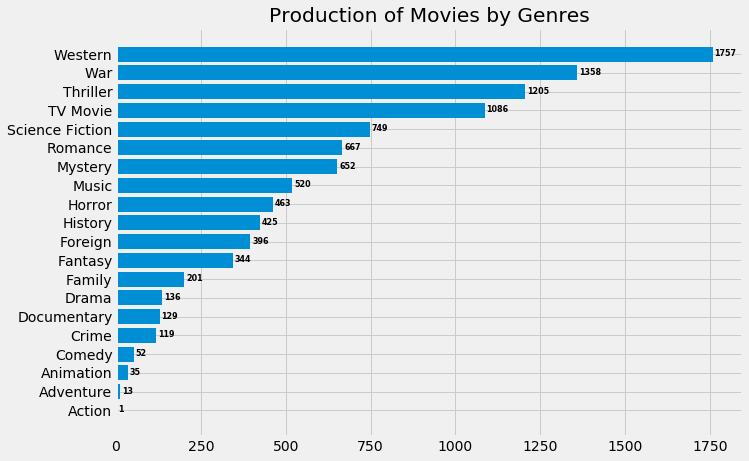

In [80]:
genres = genres_col.columns
genres_frequancy = genres_col.sum().sort_values(ascending=True)

plt.style.use('fivethirtyeight')

# the following trick (the ax. one) is from internet ;)

fig, ax = plt.subplots(figsize=(10,7)) 

ax.barh(genres,genres_frequancy);
ax.set_title('Production of Movies by Genres');

for i in ax.patches:
    ax.text(i.get_width()+5, i.get_y()+0.3, str(round((i.get_width()), 2)),
            fontsize=8, fontweight='bold')
    
plt.show()

In [81]:
# choosing the desired genre dummies
sience_fiction_col = genres_col['Science Fiction']
sience_fiction_col.head(7)

0    1
1    1
2    1
3    1
4    0
5    0
6    1
Name: Science Fiction, dtype: int64

In [82]:
# defining a new dataFrame that containo sience fiction dummies
df1 = pd.concat([df_movies,sience_fiction_col], axis=1)
df1.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,1915-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,1915-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,1
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,1915-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,1915-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,1915-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,0


In [85]:
# filtering science fiction movies and assigning to a new dataframe
science_fiction_movies_data = df1[df1['Science Fiction']==1]
science_fiction_movies_data.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,1915-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,1915-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,1
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,1915-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,1915-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1
6,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,1915-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,1


In [86]:
science_fiction_movies_data.shape

(520, 17)

#### What is science fiction movies average budget?

In [87]:
science_fiction_movies_data.budget_adj.mean()

65548729.2549451

#### What is science fiction movies average revenue?

In [88]:
science_fiction_movies_data.revenue_adj.mean()

201766245.9825575

#### What is science fiction movies average runtime?

In [89]:
science_fiction_movies_data.runtime.mean()

108.2173076923077

#### Who is most producer company of sience fictio movies genre?

In [90]:
top_scienc_fiction_companies = science_fiction_movies_data.production_companies.str.get_dummies('|').sum().nlargest(n=10)
top_scienc_fiction_companies

Twentieth Century Fox Film Corporation    50
Paramount Pictures                        46
Warner Bros.                              46
Universal Pictures                        43
New Line Cinema                           24
Amblin Entertainment                      20
Columbia Pictures                         18
Metro-Goldwyn-Mayer (MGM)                 15
Touchstone Pictures                       15
Village Roadshow Pictures                 15
dtype: int64

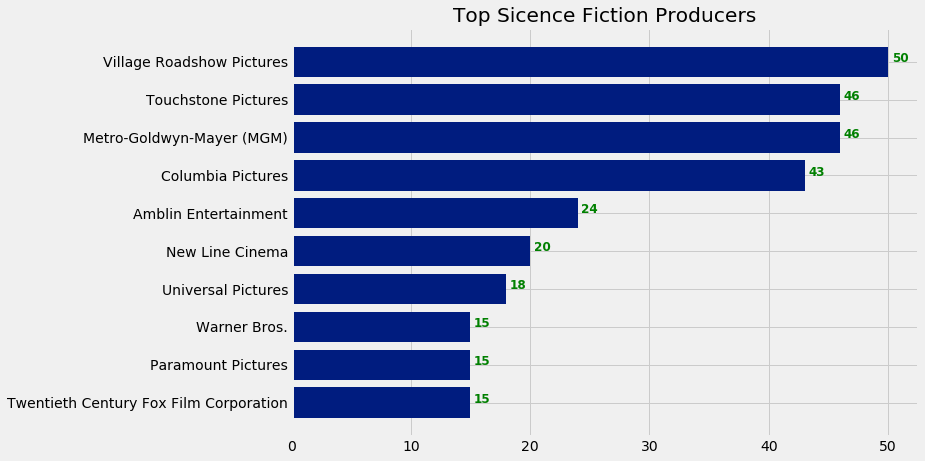

In [91]:
companies_names = top_scienc_fiction_companies.index

plt.style.use('seaborn-dark-palette')

# the following trick (the ax. ) is from internet ;)

fig, ax = plt.subplots(figsize=(10,7)) 

ax.barh(companies_names,top_scienc_fiction_companies.sort_values(ascending=True));
ax.set_title('Top Sicence Fiction Producers');

for i in ax.patches:
    ax.text(i.get_width()+0.3, i.get_y()+0.4, str(round((i.get_width()), 2)),
            fontsize=12, fontweight='bold', color='green')
    
plt.show()

#### What are the most used key words in this movies genre?

In [92]:
science_fiction_movies_data.keywords.str.get_dummies('|').sum().nlargest(n=10)

dystopia                   83
alien                      33
saving the world           28
future                     24
artificial intelligence    23
mutant                     20
post-apocalyptic           20
space marine               20
superhero                  20
marvel comic               19
dtype: int64

#### What is the general trend of sience fiction movies production?

In [95]:
sience_fiction_trend = science_fiction_movies_data.groupby(by='release_year')['Science Fiction'].sum()
sience_fiction_trend.tail()

release_year
2011    23
2012    23
2013    20
2014    23
2015    22
Name: Science Fiction, dtype: int64

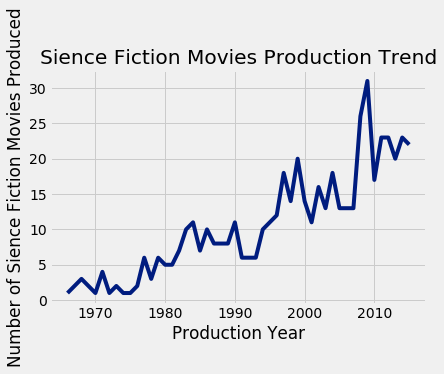

In [96]:
year = sience_fiction_trend.index

#plt.style.use('')

plt.plot(year,sience_fiction_trend);
plt.title('Sience Fiction Movies Production Trend')
plt.xlabel('Production Year')
plt.ylabel('Number of Sience Fiction Movies Produced')
plt.show()

<a id='conclusions'></a>
## Conclusions

In conclusion, the tmdb movies dataset has been investigated. In summary, it has been concluded that the most popular movies of all time have an average runtime about 113 min. and an average budget $68M and an average revenue of $420M. Also, it has been found that the most revenues directors have an average budget of about $110M and prefer advantuer, sience fiction, and action movies with an average runtime of 131 minutes. Finally, sience fiction movie production have a positive trend, with domination of 10 companies on about 56% of the production. It has an average budget of $65M , and $202M average revenue with 108 min. average runtime. 

Limitations:
- many lost data that mainly affected the neasure of categorcal data in this dataset such as genres.
- no statistical test were applied.